<a href="https://colab.research.google.com/github/AndreaCastiella/Natural-Language-Processing-in-Tensorflow/blob/main/Course_3_Week_3_Lesson_1c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Layer GRU

In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import tensorflow_datasets as tfds
print(tf.__version__)

2.4.1


In [9]:
# Get data

dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [10]:
tokenizer = info.features['text'].encoder

In [12]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [18]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 225s 570ms/step - loss: 0.5766 - acc: 0.6592 - val_loss: 0.3109 - val_acc: 0.8718
Epoch 2/10
391/391 [==============================] - 224s 571ms/step - loss: 0.2213 - acc: 0.9202 - val_loss: 0.2981 - val_acc: 0.8776
Epoch 3/10
391/391 [==============================] - 224s 571ms/step - loss: 0.1642 - acc: 0.9421 - val_loss: 0.3239 - val_acc: 0.8736
Epoch 4/10
391/391 [==============================] - 224s 571ms/step - loss: 0.1291 - acc: 0.9572 - val_loss: 0.3780 - val_acc: 0.8602
Epoch 5/10
391/391 [==============================] - 223s 568ms/step - loss: 0.1024 - acc: 0.9670 - val_loss: 0.4470 - val_acc: 0.8546
Epoch 6/10
391/391 [==============================] - 223s 569ms/step - loss: 0.0789 - acc: 0.9751 - val_loss: 0.4853 - val_acc: 0.8593
Epoch 7/10
391/391 [==============================] - 223s 569ms/step - loss: 0.0638 - acc: 0.9816 - val_loss: 0.5752 - val_acc: 0.8576
Epoch 8/10
391/391 [============================

In [19]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

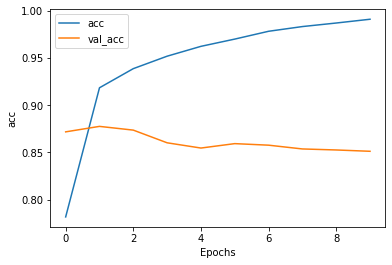

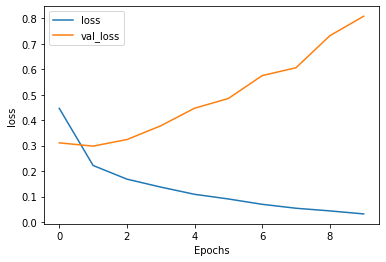

In [20]:
plot_graphs(history, 'acc')
plot_graphs(history, 'loss')